# Aim of the notebook
This notebook is made for the Capstone Project of the Data Science Intensive Course at Springboard.

## Capstone Project
The project focuses on the Caltech256 data set. (Source: http://www.vision.caltech.edu/Image_Datasets/Caltech256/)<br>
Goal is to classify 256 different object categories.

## Approach
1. Analyze the dataset
2. Choose a proper model based on the analysis
3. Train the model
4. Improve model
5. Submit

## 1. Analyze the dataset
- Overview about the data.
- Check how the images look.
- Check how many training examples are aviable for each class
- Check the size of the images.
- Check the RGB - Values of different classes.

In [1]:
# import libraries
from matplotlib import pyplot as plt
from IPython.display import Image
from collections import Counter
import PIL as pil
import os as os
import numpy as np
import pandas as pd
import cv2
import seaborn as sns

%matplotlib inline

#### Overview about the data.
The data contains 256 different classes

#### Check how the images look.

The following images show some randomly choosen images of the dataset, in different categories.

AK47

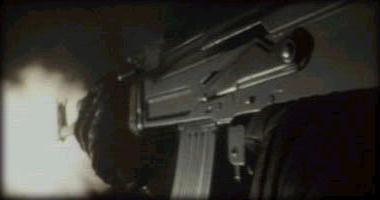

In [2]:
Image(data='data/001.ak47/001_0005.jpg')

Brain

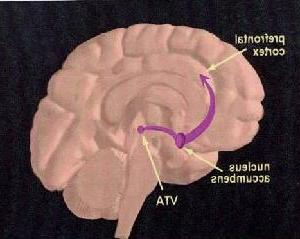

In [3]:
Image(data='data/020.brain-101/020_0064.jpg')

Breadmaker

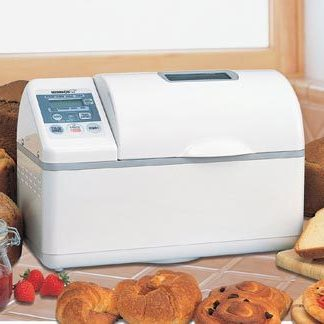

In [4]:
Image(data='data/021.breadmaker/021_0030.jpg')

IPod

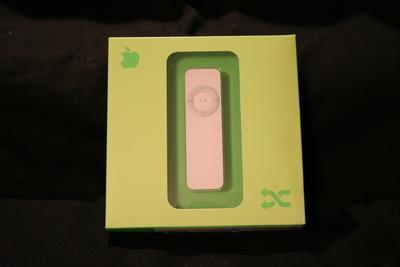

In [5]:
Image(data='data/117.ipod/117_0029.jpg')

Leopard

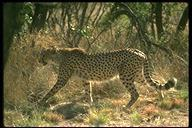

In [6]:
Image(data='data/129.leopards-101/129_0012.jpg')

#### Check how many training examples are aviable for each class

In [7]:
# returns the amount of files with a specific extension
def count_files(path, extension=".jpg"):
    count = 0
    for file in os.listdir(path):
        if file.endswith(extension):
            count += 1
    return count

In [8]:
# returns a pandas Dataframe with two columns, containg folder name and the amount of files for that folder
def files_per_folder(path, extension=".jpg"):
    df = pd.DataFrame(columns=["folder", "count"])
    for file in os.listdir(path):
        child = os.path.join(path, file)
        if os.path.isdir(child):
            count = count_files(child, extension)
            df = df.append({
                "folder": file,
                "count": count
            }, ignore_index=True)
    return df

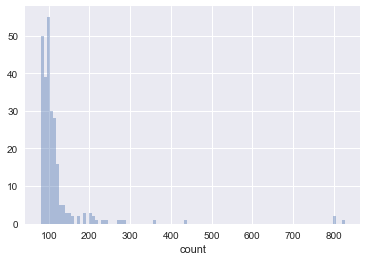

In [9]:
classes = files_per_folder("data")
sns.distplot(classes["count"], 100, kde=False)

In [10]:
sample_count = classes['count']
print("Mean: ", round(sample_count.mean()))
print("Min: ", sample_count.min())
print("Max: ", sample_count.max())

Mean:  119.0
Min:  80.0
Max:  827.0


We have on average about 119 training examples, on some classes have more than 800 samples.

#### Check the size of the images.

In [11]:
# lists the occurences of image resolutions in a directory
def image_resolution_occurance(path):
    sizes = {}
    for file in os.listdir(path):
        if file.endswith("jpg"):
            child = os.path.join(path, file)
            im = pil.Image.open(child)
            try:
                sizes[im.size] += 1
            except:
                sizes[im.size] = 1
    return sizes

In [12]:
# get the image resolutions for each directory in path and sum it up
def image_resolution_occurance_multi(path):
    occ = Counter({})
    for file in os.listdir(path):
        child = os.path.join(path, file)
        if os.path.isdir(child):
            sizes = image_resolution_occurance(child)
            occ += Counter(sizes)
    return occ

In [13]:
occurrances = image_resolution_occurance_multi("data")

In [14]:
occurrances = pd.DataFrame.from_dict(occurrances, orient='index').reset_index()
occurrances.columns = ["res", "occ"]
occurrances.head()

,res,occ
0,"(180, 313)",1
1,"(399, 217)",1
2,"(280, 261)",2
3,"(350, 617)",1
4,"(261, 216)",1


In [15]:
len(occurrances)

15423

We see that we have 15423 different image resoultions.

In [17]:
im = pil.Image.open("data/001.ak47/001_0003.jpg")

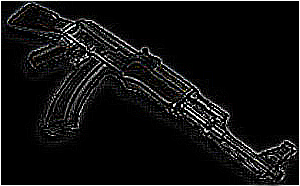

In [18]:
im.filter(pil.ImageFilter.FIND_EDGES)